In [1]:
import pandas as pd
import statsmodels.formula.api as smf

In [2]:
#import RTW data

mydata=pd.read_csv("claims_data_excel1_random2_ed_miss_res_50.csv")

In [3]:
mydata1=pd.read_csv("claims_data_excel1_random2_ed_miss.csv")

In [4]:
mydata.head()

,Claim_ID,age,sex,education,marital_status,residence,job_tenure,pre_inj_avg_weekly_wage,attorney_involvement,pre_injury_occupation,pre_injury_industry,nat_injury_illness,body_part_affected,sev_perm_impairment,time_elapsed,pre_claim_status,RTW
0,492107,1,1,4.0,1,50,2,2,1,1,9,4,4,4,3,1,0
1,237682,1,0,2.0,1,0,1,3,0,1,0,4,1,0,4,1,1
2,190355,0,1,0.0,0,0,0,1,0,1,0,1,1,4,4,1,1
3,339168,1,0,NaN,0,50,0,2,1,1,1,3,3,1,2,1,0
4,942239,4,0,2.0,1,50,2,0,1,1,7,5,2,0,4,1,0


In [5]:
mydata.describe()

,Claim_ID,age,sex,education,marital_status,residence,job_tenure,pre_inj_avg_weekly_wage,attorney_involvement,pre_injury_occupation,pre_injury_industry,nat_injury_illness,body_part_affected,sev_perm_impairment,time_elapsed,pre_claim_status,RTW
count,1.537200e+04,15372.000000,15372.000000,14860.000000,15372.000000,15372.000000,15372.000000,15372.000000,15372.000000,15372.000000,15372.000000,15372.000000,15372.000000,15372.000000,15372.000000,15372.0,15372.000000
mean,3.078555e+06,1.991283,0.501952,2.119112,0.501171,25.300416,0.998699,1.670960,0.596409,0.737835,4.981915,2.494210,2.520362,2.087822,1.606948,1.0,0.499024
std,2.480558e+06,1.411424,0.500012,1.407229,0.500015,24.751160,0.818432,1.153264,0.490633,0.439826,3.185777,1.706575,1.665054,1.811518,1.496492,0.0,0.500015
min,1.125000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,7.162152e+05,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.0,0.000000
50%,2.610912e+06,2.000000,1.000000,2.000000,1.000000,50.000000,1.000000,2.000000,1.000000,1.000000,5.000000,3.000000,3.000000,2.000000,1.000000,1.0,0.000000
75%,5.263582e+06,3.000000,1.000000,3.000000,1.000000,50.000000,2.000000,3.000000,1.000000,1.000000,8.000000,4.000000,4.000000,4.000000,3.000000,1.0,1.000000
max,7.867364e+06,4.000000,1.000000,4.000000,1.000000,50.000000,2.000000,3.000000,1.000000,1.000000,10.000000,5.000000,5.000000,5.000000,4.000000,1.0,1.000000


In [6]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15372 entries, 0 to 15371
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Claim_ID                 15372 non-null  int64  
 1   age                      15372 non-null  int64  
 2   sex                      15372 non-null  int64  
 3   education                14860 non-null  float64
 4   marital_status           15372 non-null  int64  
 5   residence                15372 non-null  int64  
 6   job_tenure               15372 non-null  int64  
 7   pre_inj_avg_weekly_wage  15372 non-null  int64  
 8   attorney_involvement     15372 non-null  int64  
 9   pre_injury_occupation    15372 non-null  int64  
 10  pre_injury_industry      15372 non-null  int64  
 11  nat_injury_illness       15372 non-null  int64  
 12  body_part_affected       15372 non-null  int64  
 13  sev_perm_impairment      15372 non-null  int64  
 14  time_elapsed          

In [7]:
#Now we see that most of the variables that should be interpreted as categorical are imported as continuous
# So we need to change the data type

mydata['age']=mydata['age'].apply(str)
mydata['sex']=mydata['sex'].apply(str)
mydata['education']=mydata['education'].apply(str)
mydata['marital_status']=mydata['marital_status'].apply(str)
mydata['residence']=mydata['residence'].apply(str)
mydata['job_tenure']=mydata['job_tenure'].apply(str)
mydata['pre_inj_avg_weekly_wage']=mydata['pre_inj_avg_weekly_wage'].apply(str)
mydata['attorney_involvement']=mydata['attorney_involvement'].apply(str)
mydata['pre_injury_occupation']=mydata['pre_injury_occupation'].apply(str)
mydata['pre_injury_industry']=mydata['pre_injury_industry'].apply(str)
mydata['nat_injury_illness']=mydata['nat_injury_illness'].apply(str)
mydata['body_part_affected']=mydata['body_part_affected'].apply(str)



mydata['sev_perm_impairment']=mydata['sev_perm_impairment'].apply(str)
mydata['time_elapsed']=mydata['time_elapsed'].apply(str)
mydata['pre_claim_status']=mydata['pre_claim_status'].apply(str)



In [8]:
mydata['RTW']=mydata['RTW'].apply(str)


In [9]:
mydata.describe()

,Claim_ID
count,1.537200e+04
mean,3.078555e+06
std,2.480558e+06
min,1.125000e+03
25%,7.162152e+05
50%,2.610912e+06
75%,5.263582e+06
max,7.867364e+06


In [10]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15372 entries, 0 to 15371
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Claim_ID                 15372 non-null  int64 
 1   age                      15372 non-null  object
 2   sex                      15372 non-null  object
 3   education                15372 non-null  object
 4   marital_status           15372 non-null  object
 5   residence                15372 non-null  object
 6   job_tenure               15372 non-null  object
 7   pre_inj_avg_weekly_wage  15372 non-null  object
 8   attorney_involvement     15372 non-null  object
 9   pre_injury_occupation    15372 non-null  object
 10  pre_injury_industry      15372 non-null  object
 11  nat_injury_illness       15372 non-null  object
 12  body_part_affected       15372 non-null  object
 13  sev_perm_impairment      15372 non-null  object
 14  time_elapsed             15372 non-nul

In [11]:
#Define a function which returns unique values in the dataframe with a count
def rstr(df):
    return df.shape, df.apply(lambda x: [x.unique()])

In [12]:
rstr(mydata)

((15372, 17),
                                             Claim_ID              age     sex  \
 0  [492107, 237682, 190355, 339168, 942239, 92379...  [1, 0, 4, 3, 2]  [1, 0]   
 
                         education marital_status   residence job_tenure  \
 0  [4.0, 2.0, 0.0, nan, 1.0, 3.0]         [1, 0]  [50, 0, 1]  [2, 1, 0]   
 
   pre_inj_avg_weekly_wage attorney_involvement pre_injury_occupation  \
 0            [2, 3, 1, 0]               [1, 0]                [1, 0]   
 
                   pre_injury_industry  nat_injury_illness  body_part_affected  \
 0  [9, 0, 1, 7, 5, 6, 4, 10, 3, 2, 8]  [4, 1, 3, 5, 2, 0]  [4, 1, 3, 2, 0, 5]   
 
   sev_perm_impairment     time_elapsed pre_claim_status     RTW  
 0  [4, 0, 1, 2, 3, 5]  [3, 4, 2, 0, 1]              [1]  [0, 1]  )

In [13]:
print(mydata['age'].value_counts().sort_index())
print("\n")

0    3097
1    3103
2    2993
3    3195
4    2984
Name: age, dtype: int64




In [14]:
print(mydata['age'].value_counts().sort_index())
print("\n")
print(mydata['sex'].value_counts().sort_index())
print("\n")
print(mydata['education'].value_counts().sort_index())
print("\n")
print(mydata['marital_status'].value_counts().sort_index())
print("\n")
print(mydata['residence'].value_counts().sort_index())
print("\n")
print(mydata['job_tenure'].value_counts().sort_index())
print("\n")
print(mydata['pre_inj_avg_weekly_wage'].value_counts().sort_index())


0    3097
1    3103
2    2993
3    3195
4    2984
Name: age, dtype: int64


0    7656
1    7716
Name: sex, dtype: int64


0.0    2520
1.0    2981
2.0    2960
3.0    3007
4.0    3392
nan     512
Name: education, dtype: int64


0    7668
1    7704
Name: marital_status, dtype: int64


0     3803
1     3868
50    7701
Name: residence, dtype: int64


0    5158
1    5076
2    5138
Name: job_tenure, dtype: int64


0    3409
1    3356
2    3491
3    5116
Name: pre_inj_avg_weekly_wage, dtype: int64


In [15]:
print("\n")
print(mydata['attorney_involvement'].value_counts().sort_index())
print("\n")
print(mydata['pre_injury_occupation'].value_counts().sort_index())
print("\n")
print(mydata['pre_injury_industry'].value_counts().sort_index())
print("\n")
print(mydata['nat_injury_illness'].value_counts().sort_index())
print("\n")
print(mydata['body_part_affected'].value_counts().sort_index())
print("\n")
print(mydata['sev_perm_impairment'].value_counts().sort_index())
print("\n")
print(mydata['time_elapsed'].value_counts().sort_index())
print("\n")
print(mydata['pre_claim_status'].value_counts().sort_index())



0    6204
1    9168
Name: attorney_involvement, dtype: int64


0     4030
1    11342
Name: pre_injury_occupation, dtype: int64


0     1478
1     1365
10    1455
2     1395
3     1456
4     1312
5     1443
6     1349
7     1366
8     1387
9     1366
Name: pre_injury_industry, dtype: int64


0    2585
1    2557
2    2535
3    2587
4    2587
5    2521
Name: nat_injury_illness, dtype: int64


0    2441
1    2418
2    2447
3    3248
4    2403
5    2415
Name: body_part_affected, dtype: int64


0    4662
1    2112
2    2199
3    2132
4    2147
5    2120
Name: sev_perm_impairment, dtype: int64


0    5503
1    2438
2    2502
3    2456
4    2473
Name: time_elapsed, dtype: int64


1    15372
Name: pre_claim_status, dtype: int64


In [16]:

#Now lets print the cross-tabs

pd.crosstab(mydata['age'],mydata['RTW'])

RTW,0,1
age,,
0,1557,1540
1,1537,1566
2,1498,1495
3,1591,1604
4,1518,1466


In [17]:
pd.crosstab(mydata['education'],mydata['RTW'])

RTW,0,1
education,,
0.0,939,1581
1.0,1453,1528
2.0,1446,1514
3.0,1478,1529
4.0,1873,1519
nan,512,0


In [18]:
pd.crosstab(mydata['sex'],mydata['RTW'])

RTW,0,1
sex,,
0,3862,3794
1,3839,3877


In [19]:
pd.crosstab(mydata['marital_status'],mydata['RTW'])

RTW,0,1
marital_status,,
0,3816,3852
1,3885,3819


In [20]:
pd.crosstab(mydata['residence'],mydata['RTW'])

RTW,0,1
residence,,
0,0,3803
1,0,3868
50,7701,0


In [21]:
pd.crosstab(mydata['job_tenure'],mydata['RTW'])

RTW,0,1
job_tenure,,
0,2588,2570
1,2534,2542
2,2579,2559


In [22]:
pd.crosstab(mydata['pre_inj_avg_weekly_wage'],mydata['RTW'])

RTW,0,1
pre_inj_avg_weekly_wage,,
0,1482,1927
1,1511,1845
2,1492,1999
3,3216,1900


In [23]:
pd.crosstab(mydata['attorney_involvement'],mydata['RTW'])

RTW,0,1
attorney_involvement,,
0,2391,3813
1,5310,3858


In [24]:
pd.crosstab(mydata['pre_injury_occupation'],mydata['RTW'])

RTW,0,1
pre_injury_occupation,,
0,4030,0
1,3671,7671


In [25]:
pd.crosstab(mydata['pre_injury_industry'],mydata['RTW'])

RTW,0,1
pre_injury_industry,,
0,759,719
1,660,705
10,733,722
2,715,680
3,707,749
4,655,657
5,748,695
6,685,664
7,696,670


In [26]:
pd.crosstab(mydata['nat_injury_illness'],mydata['RTW'])

RTW,0,1
nat_injury_illness,,
0,1303,1282
1,1261,1296
2,1302,1233
3,1257,1330
4,1301,1286
5,1277,1244


In [27]:
pd.crosstab(mydata['body_part_affected'],mydata['RTW'])

RTW,0,1
body_part_affected,,
0,1161,1280
1,1157,1261
2,1102,1345
3,2047,1201
4,1128,1275
5,1106,1309


In [28]:
pd.crosstab(mydata['sev_perm_impairment'],mydata['RTW'])

RTW,0,1
sev_perm_impairment,,
0,3400,1262
1,840,1272
2,871,1328
3,867,1265
4,873,1274
5,850,1270


In [29]:
pd.crosstab(mydata['time_elapsed'],mydata['RTW'])

RTW,0,1
time_elapsed,,
0,3981,1522
1,910,1528
2,921,1581
3,906,1550
4,983,1490


In [30]:
pd.crosstab(mydata['pre_claim_status'],mydata['RTW'])

RTW,0,1
pre_claim_status,,
1,7701,7671


In [34]:
#Prepare the dataset
#drop claim_id column

mydata=mydata.drop(columns=['Claim_ID'])

In [35]:
mydata.head()

,age,sex,education,marital_status,residence,job_tenure,pre_inj_avg_weekly_wage,attorney_involvement,pre_injury_occupation,pre_injury_industry,nat_injury_illness,body_part_affected,sev_perm_impairment,time_elapsed,pre_claim_status,RTW
0,1,1,4.0,1,50,2,2,1,1,9,4,4,4,3,1,0
1,1,0,2.0,1,0,1,3,0,1,0,4,1,0,4,1,1
2,0,1,0.0,0,0,0,1,0,1,0,1,1,4,4,1,1
3,1,0,nan,0,50,0,2,1,1,1,3,3,1,2,1,0
4,4,0,2.0,1,50,2,0,1,1,7,5,2,0,4,1,0


In [36]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15372 entries, 0 to 15371
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   age                      15372 non-null  object
 1   sex                      15372 non-null  object
 2   education                15372 non-null  object
 3   marital_status           15372 non-null  object
 4   residence                15372 non-null  object
 5   job_tenure               15372 non-null  object
 6   pre_inj_avg_weekly_wage  15372 non-null  object
 7   attorney_involvement     15372 non-null  object
 8   pre_injury_occupation    15372 non-null  object
 9   pre_injury_industry      15372 non-null  object
 10  nat_injury_illness       15372 non-null  object
 11  body_part_affected       15372 non-null  object
 12  sev_perm_impairment      15372 non-null  object
 13  time_elapsed             15372 non-null  object
 14  pre_claim_status         15372 non-nul

In [43]:
mydata_dummies = pd.get_dummies(mydata, columns=['age', 'sex','education','marital_status', \
                                            'job_tenure','pre_inj_avg_weekly_wage', \
                                           'attorney_involvement','pre_injury_occupation','pre_injury_industry', \
                                           'nat_injury_illness','body_part_affected', 'sev_perm_impairment', \
                                           'time_elapsed'],drop_first=True)


In [47]:
X=mydata_dummies.drop(columns=['RTW'],axis=1)
y=mydata_dummies['RTW']

In [44]:
#train.info()
mydata_dummies.head()

,residence,pre_claim_status,RTW,age_1,age_2,age_3,age_4,sex_1,education_1.0,education_2.0,...,body_part_affected_5,sev_perm_impairment_1,sev_perm_impairment_2,sev_perm_impairment_3,sev_perm_impairment_4,sev_perm_impairment_5,time_elapsed_1,time_elapsed_2,time_elapsed_3,time_elapsed_4
0,50,1,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,50,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,50,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [48]:
#X.drop(['Claim_ID'],axis=1,inplace=True)

In [49]:
#X.drop(columns=['pre_claim_status'],axis=1,inplace=True)

In [50]:
X.head()

,residence,pre_claim_status,age_1,age_2,age_3,age_4,sex_1,education_1.0,education_2.0,education_3.0,...,body_part_affected_5,sev_perm_impairment_1,sev_perm_impairment_2,sev_perm_impairment_3,sev_perm_impairment_4,sev_perm_impairment_5,time_elapsed_1,time_elapsed_2,time_elapsed_3,time_elapsed_4
0,50,1,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,50,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,50,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [62]:
y.head()

0    0
1    1
2    1
3    0
4    0
Name: RTW, dtype: object

In [53]:
#Now do train test split

#Now lets do a train test split of the data

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3)


In [ ]:
#X.drop('residence',axis=1, inplace=True)

In [55]:
#Now we will use sklearn to run logistic regression and plot various diagnostics

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [54]:
#Prepare the dataset

#mydata1=mydata.drop(columns=['pre_claim_status','residence','Claim_ID'])
#mydata1=mydata.drop(columns=['pre_claim_status','residence'])

In [56]:
#mydata1.head()

In [ ]:
#So we can  remove nan values appearing in education or impute them with mode
#We can try different variations of dropping those rows which have missing education
#mydata1['education']=mydata1['education'].fillna(4,inplace=True)
#imputed with 4


In [57]:
logreg = LogisticRegression(C=0.01, solver='lbfgs',)

# here C is regularization smaller values specify stronger regularization.

In [58]:
logreg.fit(X_train, y_train)

LogisticRegression(C=0.01)

In [59]:
y_pred = logreg.predict(X_test)

In [60]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 1.00


In [61]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix
confusion_matrix1 = confusion_matrix(y_test, y_pred)
print(confusion_matrix1)

[[2270    0]
 [   0 2342]]


In [63]:
pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted RTW', 'Predicted Non-RTW'],
    index=['Actual RTW', 'Actual Non RTW']
)

,Predicted RTW,Predicted Non-RTW
Actual RTW,2270,0
Actual Non RTW,0,2342


In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2270
           1       1.00      1.00      1.00      2342

    accuracy                           1.00      4612
   macro avg       1.00      1.00      1.00      4612
weighted avg       1.00      1.00      1.00      4612



In [65]:
import matplotlib.pyplot as plt

In [69]:
print(y_test.head())
print(X_test.head())

4553     1
12339    1
7577     0
8013     1
5304     0
Name: RTW, dtype: object
      residence pre_claim_status  age_1  age_2  age_3  age_4  sex_1  \
4553          1                1      1      0      0      0      0   
12339         1                1      0      1      0      0      1   
7577         50                1      0      0      0      0      1   
8013          0                1      1      0      0      0      0   
5304         50                1      0      0      0      1      0   

       education_1.0  education_2.0  education_3.0  ...  body_part_affected_5  \
4553               0              0              0  ...                     0   
12339              0              0              0  ...                     0   
7577               0              0              0  ...                     1   
8013               0              0              0  ...                     0   
5304               0              0              0  ...                     0   

      

In [70]:
y_true=y_test.astype(int)

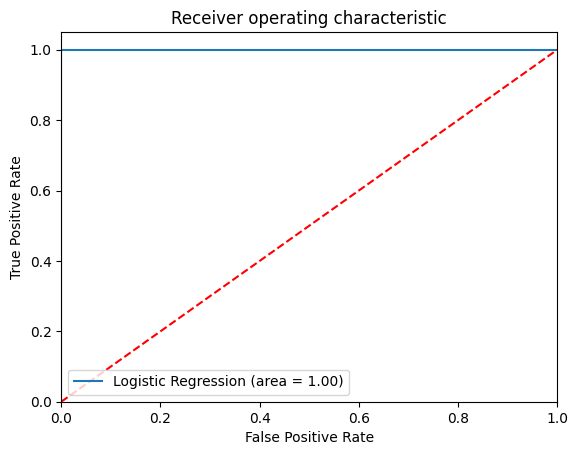

In [72]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_true, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_true, logreg.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower left")
plt.savefig('Log_ROC')
plt.show()